Nama : Nurul Fajriyah Al Maulidiyah

Kode : PYTN-KS14-001

# Bank Marketing Dataset
Dataset yang digunakan adalah [bank-additional.csv](https://raw.githubusercontent.com/ria-fajriyah/BankMarketing_Dataset/main/bank-additional-full.csv) yang berisi tentang direct marketing campaign dari lembaga perbankan Portugis. Tujuan klasifikasi yang dilakukan adalah untuk memprediksi apakah klien akan berlangganan deposito berjangka dengan pilihan ('yes') atau ('no') pada variabel y

# Import Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# menonaktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

# Membaca dataset 

Menampilkan dataset dengan menggunakan fungsi `sep` (separator atau pemisah) untuk memisahkan objek yang dipisah dengan tanda `;`

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ria-fajriyah/BankMarketing_Dataset/main/bank-additional-full.csv', sep=';')
df_bank = pd.DataFrame(dataset)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Menampilkan jumlah baris dan kolom dari DataFrame

In [3]:
df_bank.shape

(41188, 21)

Menampilkan informasi detail tentang DataFrame seperti jumlah baris data, nama-nama kolom beserta jumlah data dan tipe datanya, dan sebagainya

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Menampilkan statistik deskriptif data dalam DataFrame

In [5]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Keterangan**

- `age` : umur klien (numeric)
- `job` : tipe pekerjaan klien (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur","student", "blue-collar", "self-employed", "retired", "technician", "services") 
- `marital` : status pernikahan klien (categorical: "unknown", "married", "divorced", "single"; catatan : "divorced" berarti bercerai atau janda)
- `education` : tingkat pendidikan klien (categorical: "unknown", "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "profesional.course", "university.degree")
- `default` : apakah pelanggan memiliki kredit dalam default? (binary: "yes", "no")
- `balance` : saldo tahunan rata-rata, dalam euro (numeric) 
- `housing` : apakah pelanggan memiliki pinjaman perumahan? (binary: "yes","no")
- `loan` : apakah pelanggan memiliki pinjaman pribadi (binary: "yes","no")

**terkait dengan kontak terakhir dari kampanye saat ini:**
- `contact` : jenis komunikasi (categorical: "unknown", "telephone", "cellular") 
- `day` : hari kontak terakhir pada bulan tersebut (numeric)
- `month` : bulan kontak terakhir pada tahun tersebut (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- `duration` : durasi kontak terakhir, dalam detik (numeric)

**atribut lain:**
- `campaign` : jumlah kontak yang dilakukan dengan klien selama kampanye (numeric, termasuk kontak terakhir)
- `pdays` : jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numeric, -1 berarti klien sebelumnya tidak dihubungi)
- `previous` : jumlah kontak yang dilakukan dengan klien sebelum kampanye ini (numeric)
- `poutcome` : hasil dari kampanye pemasaran sebelumnya (categorical: "unknown", "other", "failure", "success")
- `emp.var.rate` : tingkat variasi pekerjaan - indikator triwulan (numeric)
- `cons.price.idx` : indeks harga konsumen - indikator bulanan (numeric)
- `cons.conf.idx` : indeks kepercayaan konsumen - indikator bulanan (numeric)
- `euribor3m` : tarif 3 bulan euribor - indikator harian (numeric)
- `nr.employed` : jumlah karyawan - indikator triwulanan (numeric)

**Output variable (target yang diinginkan):**
- `y` : apakah klien sudah berlangganan deposito berjangka? (binary : "yes", "no")

# Data Preprocessing

## Data Cleaning

Mengecek apakah ada missing value

In [6]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Mengecek apakah ada duplikat dalam data dan jumlah value dalam DataFrame

In [7]:
df_bank.duplicated().value_counts()

False    41176
True        12
dtype: int64

Menghapus data duplikat

In [8]:
df_bank.drop_duplicates(inplace=True)

Mengecek kembali apakah masih ada data duplikat

In [9]:
df_bank.duplicated().value_counts()

False    41176
dtype: int64

## Label Encoder
Menggunakan Label Encoder untuk mengkonversi data yang bertipe object menjadi numerik (int32) agar memudahkan untuk dilakukan training dan testing

In [10]:
# menginisiasi objek LabelEncoder
le = LabelEncoder()

# memilih variabel yang akan di convert
df_category = df_bank.select_dtypes(include='object')
le_bank = df_bank.copy()

# mengkonversi variabel kategorikal menggunakan LabelEncoder
for var in df_category:
    le_bank[var] = le.fit_transform(le_bank[var])

# menampilkan hasil data yang telah di convert
le_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
le_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int32  
 5   housing         41176 non-null  int32  
 6   loan            41176 non-null  int32  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int32  
 9   day_of_week     41176 non-null  int32  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int32  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

## Standard Scaler

Membagi dataset menjadi data latih (train) dan data uji (test) serta membuang kolom `y` pada x_train dan x_test, lalu memasukkan kolom `y` pada y_train dan y_test 

In [12]:
train, test = train_test_split(le_bank, test_size = 0.2, random_state = 42)
    
# memisahkan variabel dependen dan independen pada data training dan testing
x_train = train.drop(labels='y',axis=1)
y_train = train['y']
x_test  = test.drop(labels='y',axis=1)
y_test  = test['y']

Menggunakan standard scaler yang merupakan class dari sklearn untuk melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Visualisasi Data

**Bar Plot untuk 'df_bank' yang bertipe data object**

Membuat variabel kategori untuk menampung data dengan tipe data object 

In [14]:
kategori = df_bank.select_dtypes(include=['object']).columns.values

for col in kategori:
    print(col, "(", len(df_bank[col].unique()),"values):\n", np.sort(df_bank[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']
y ( 2 values):
 ['no' 'yes']


Membuat bar plot untuk variabel kategori

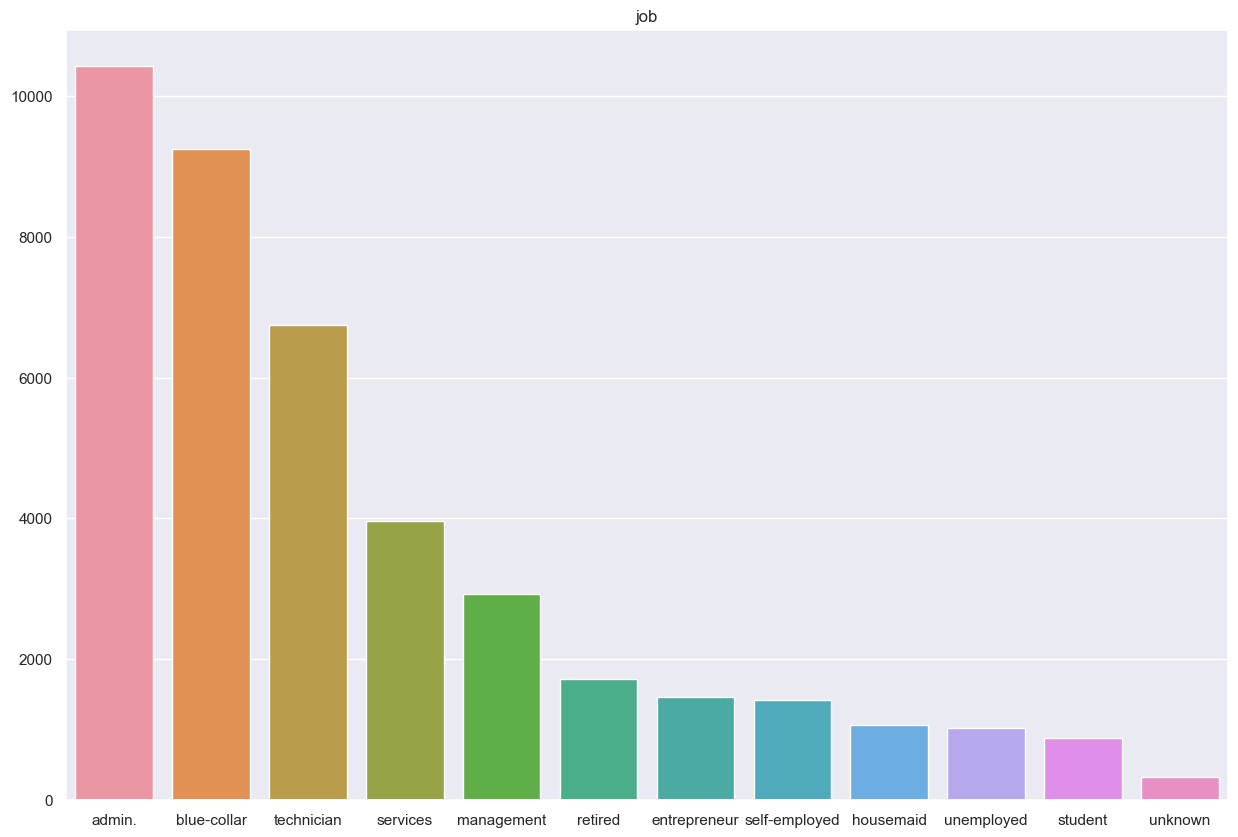

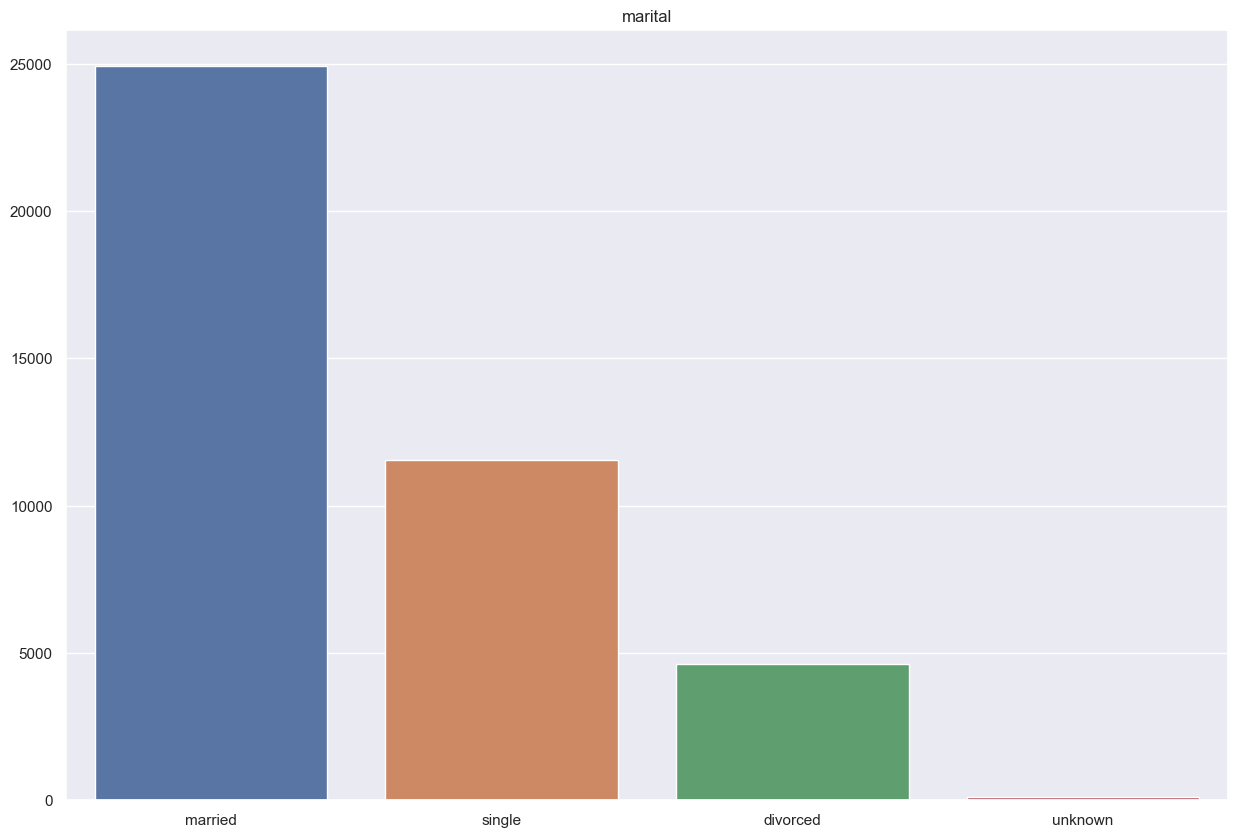

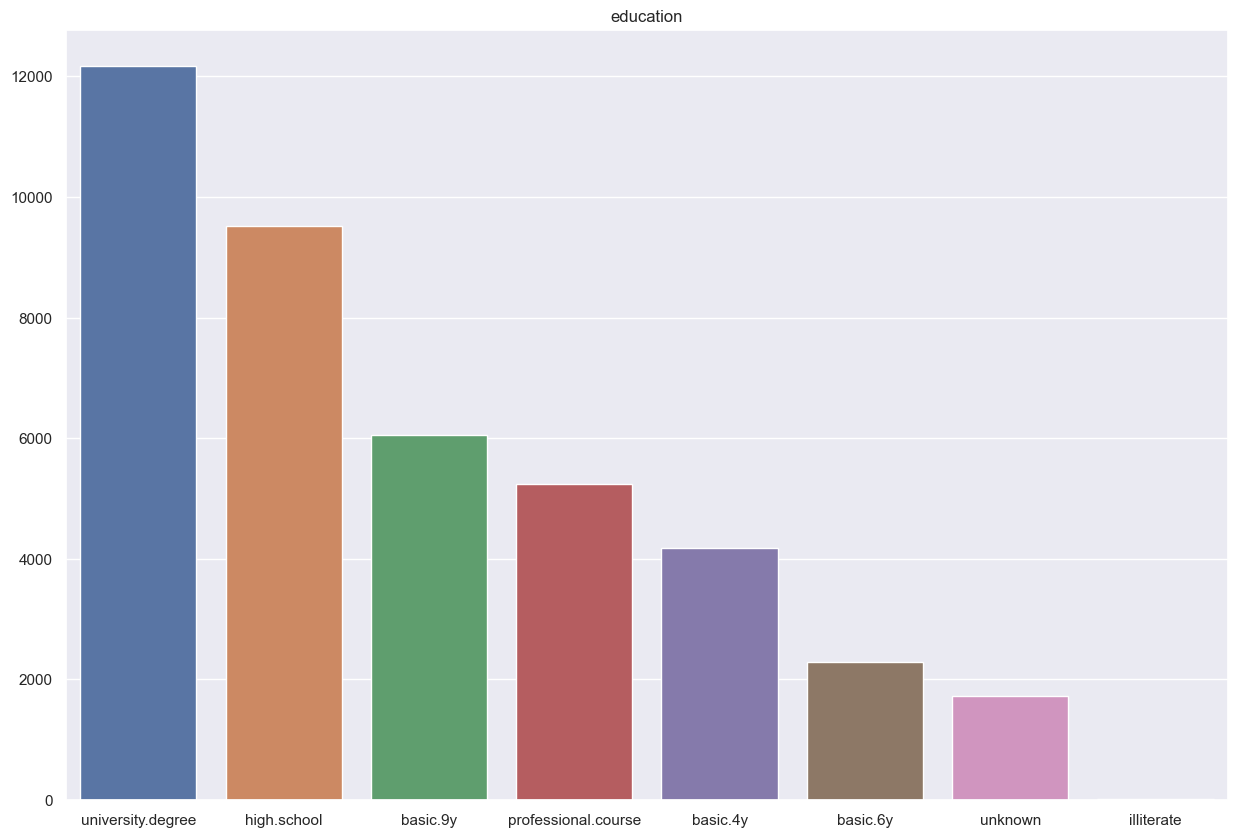

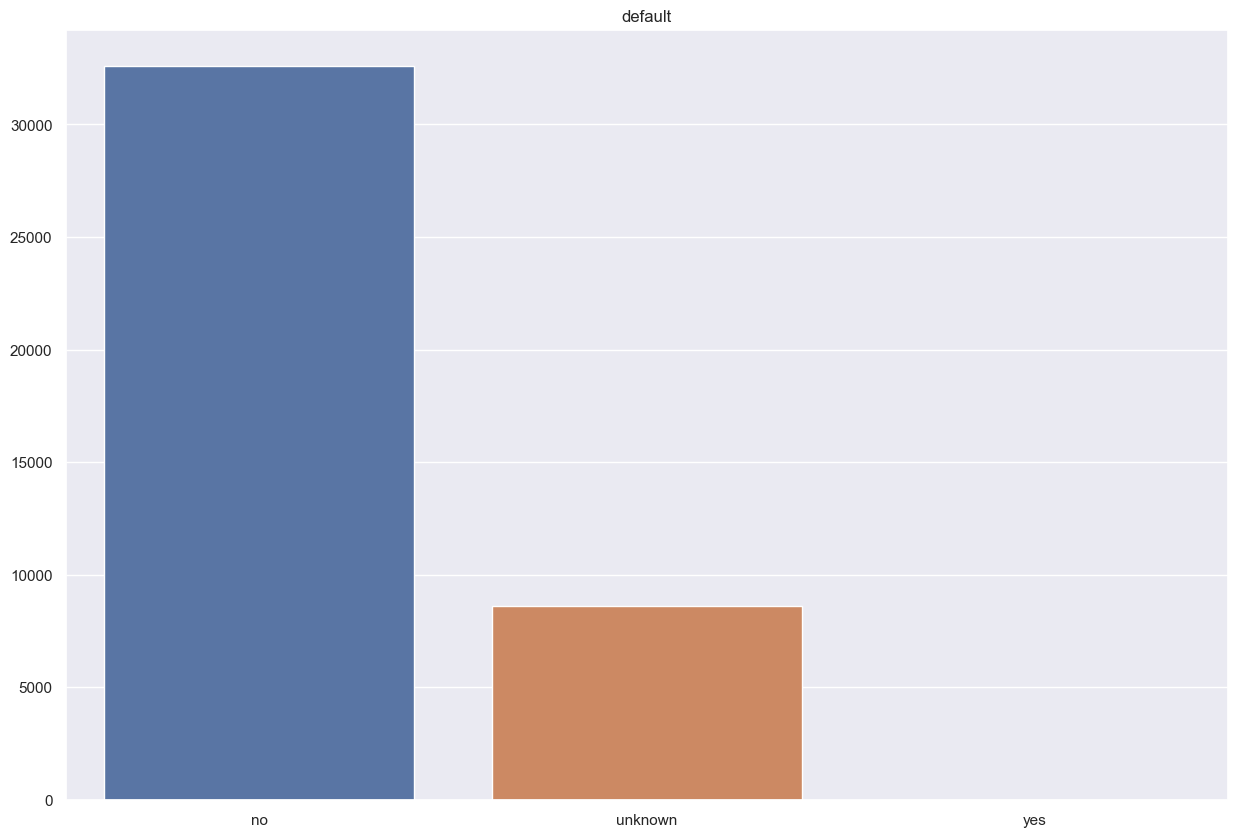

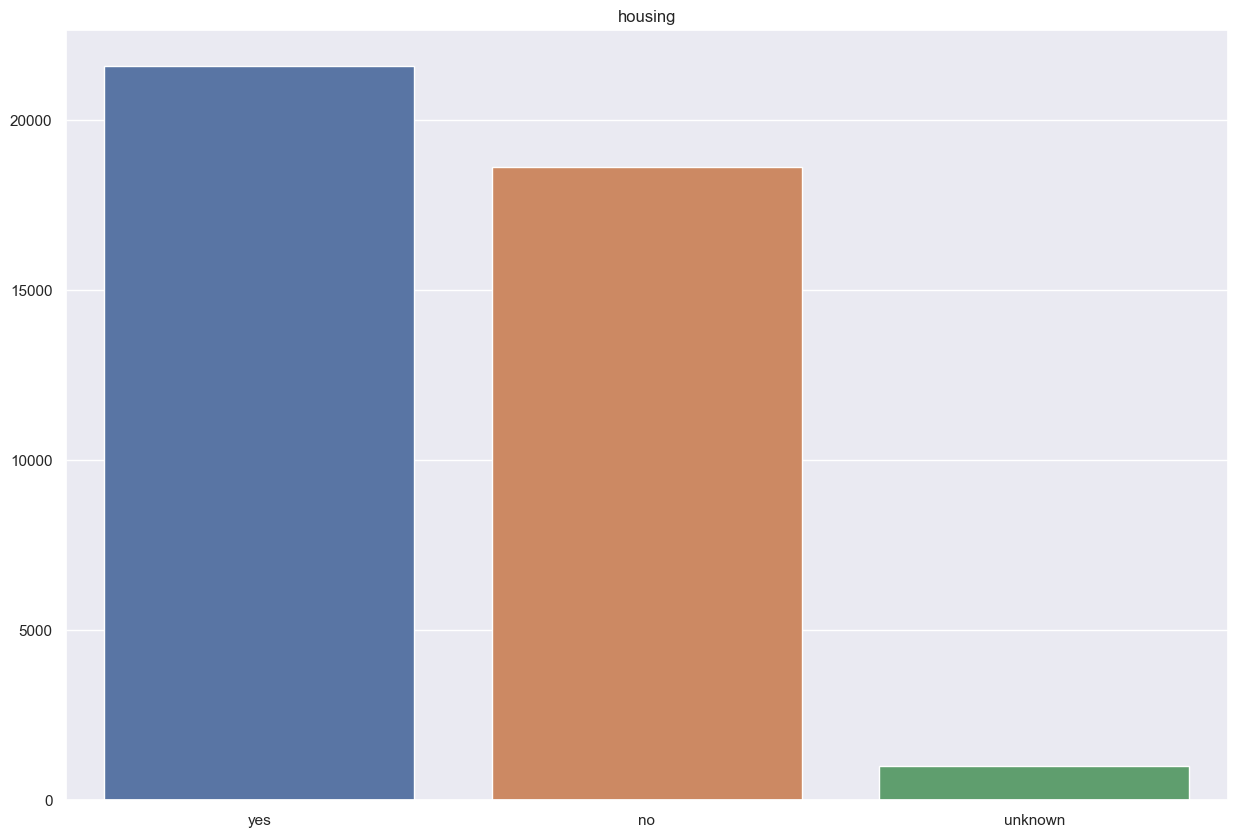

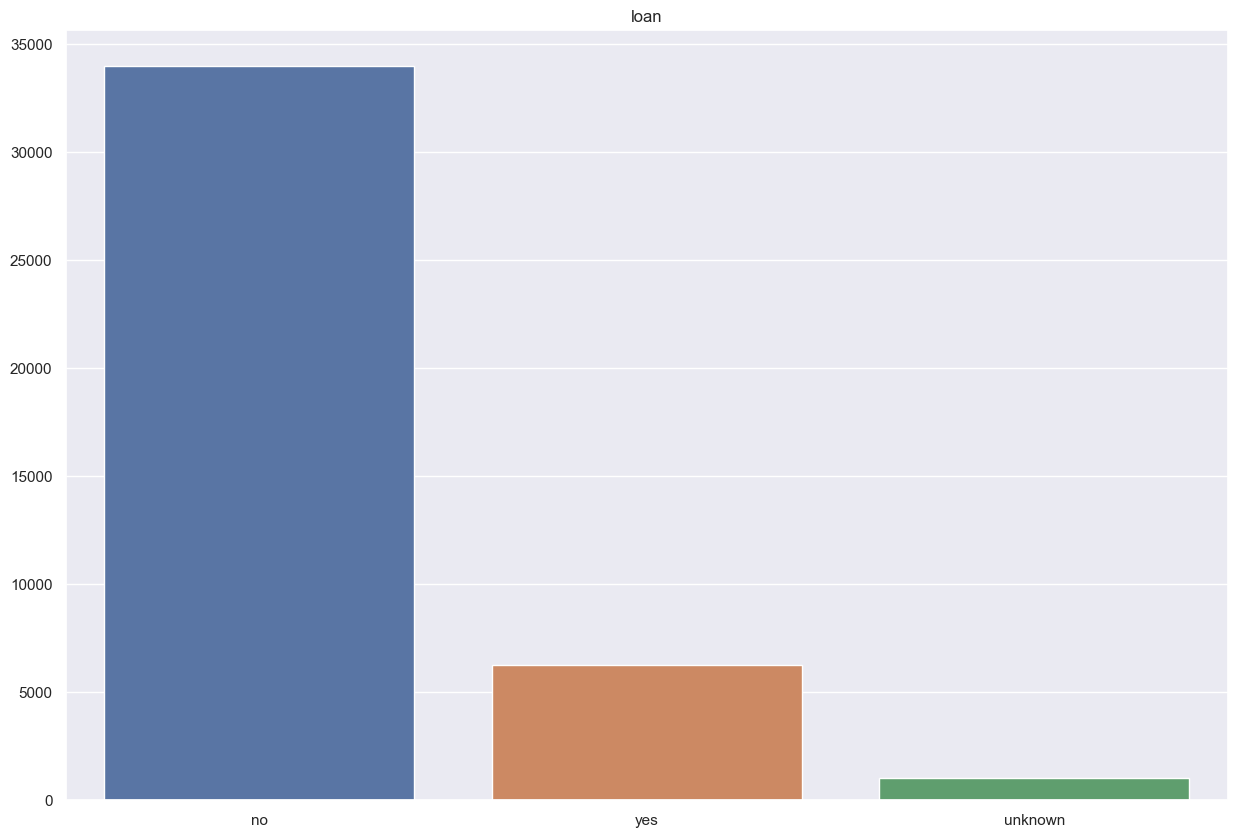

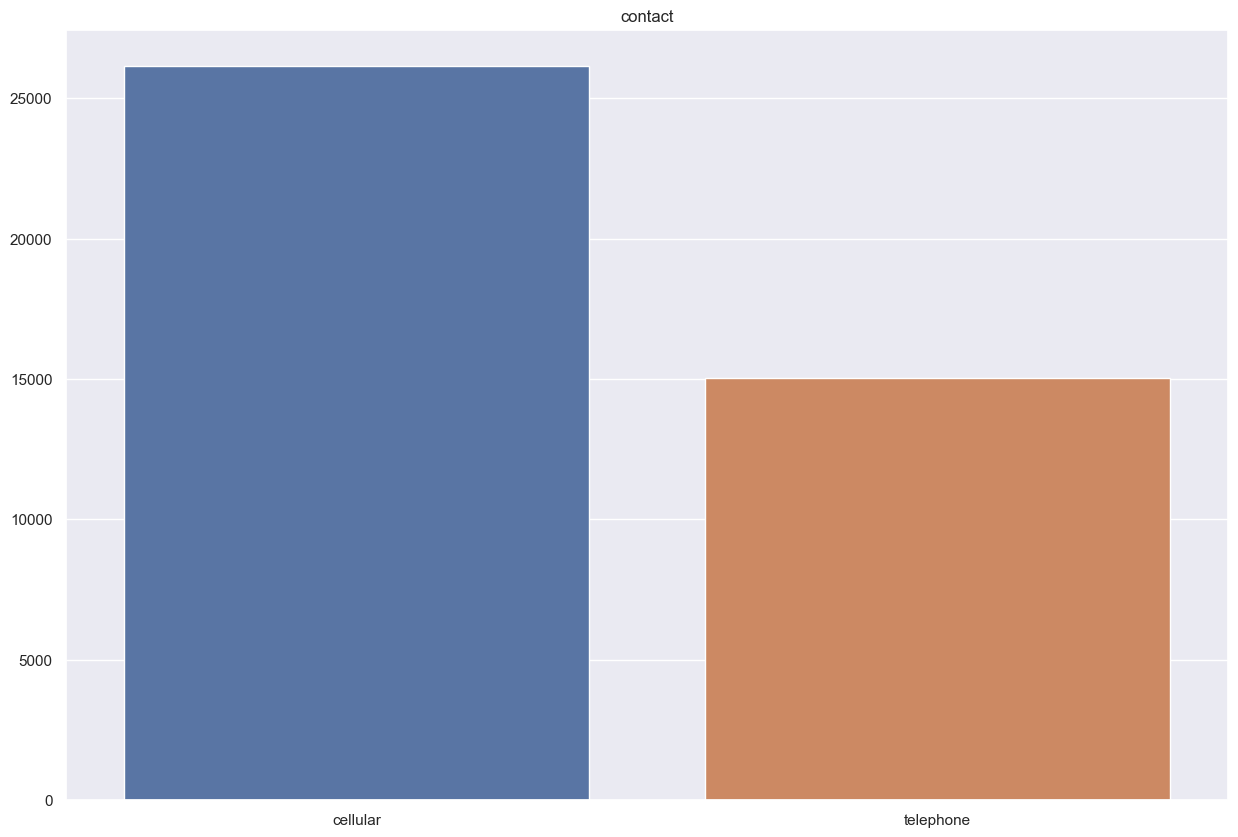

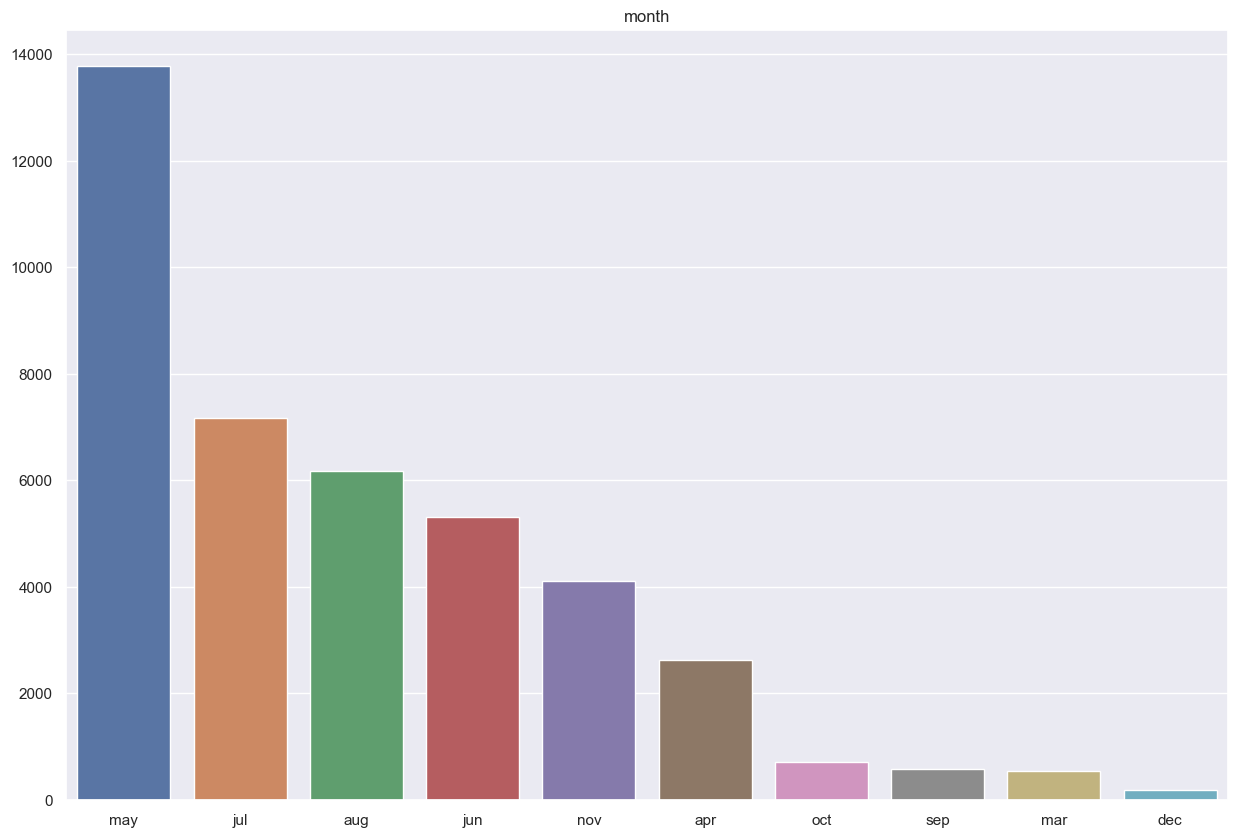

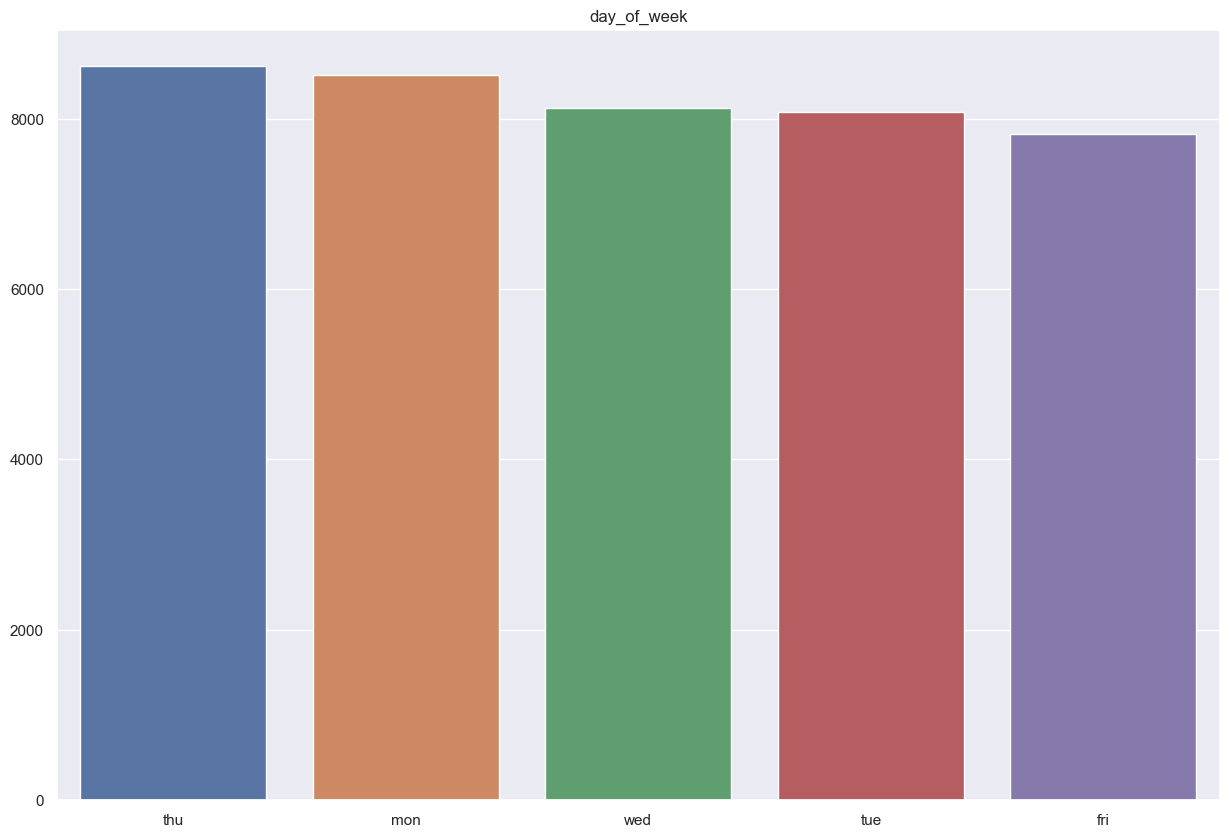

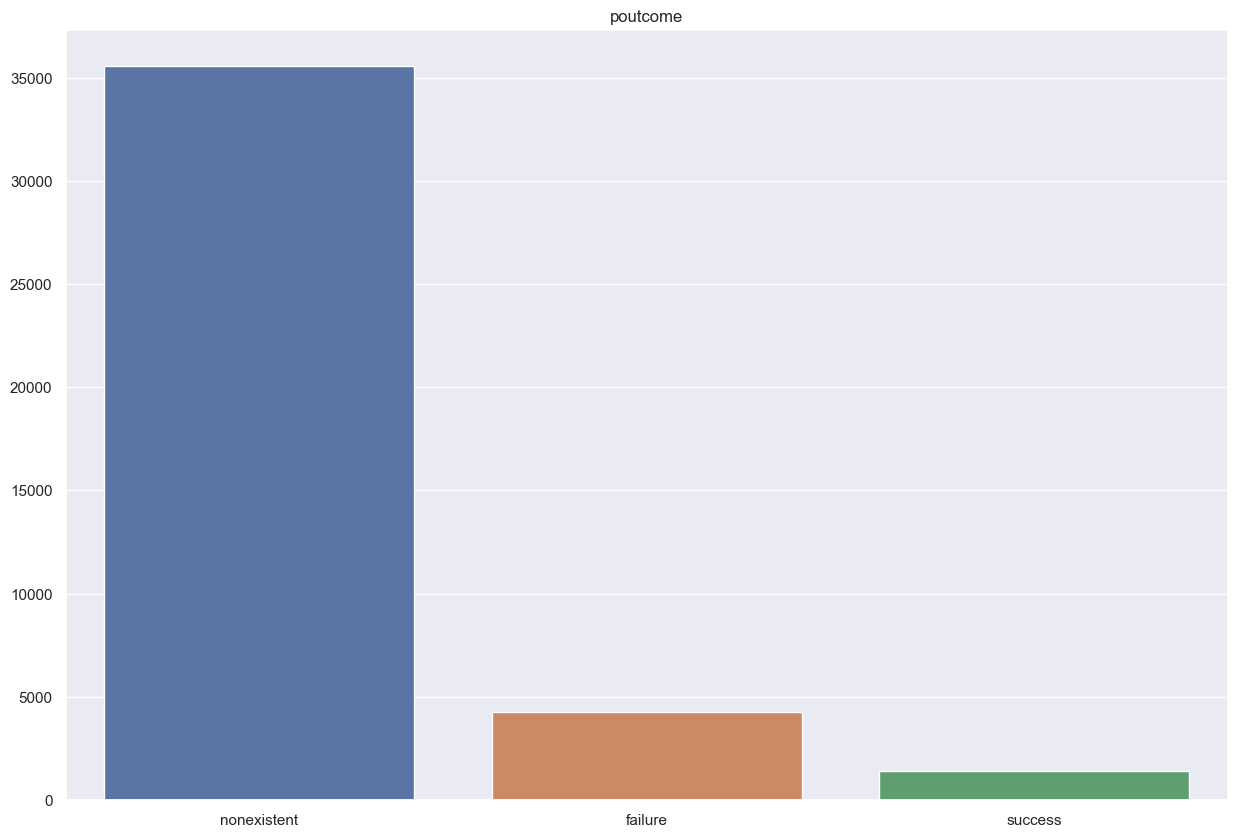

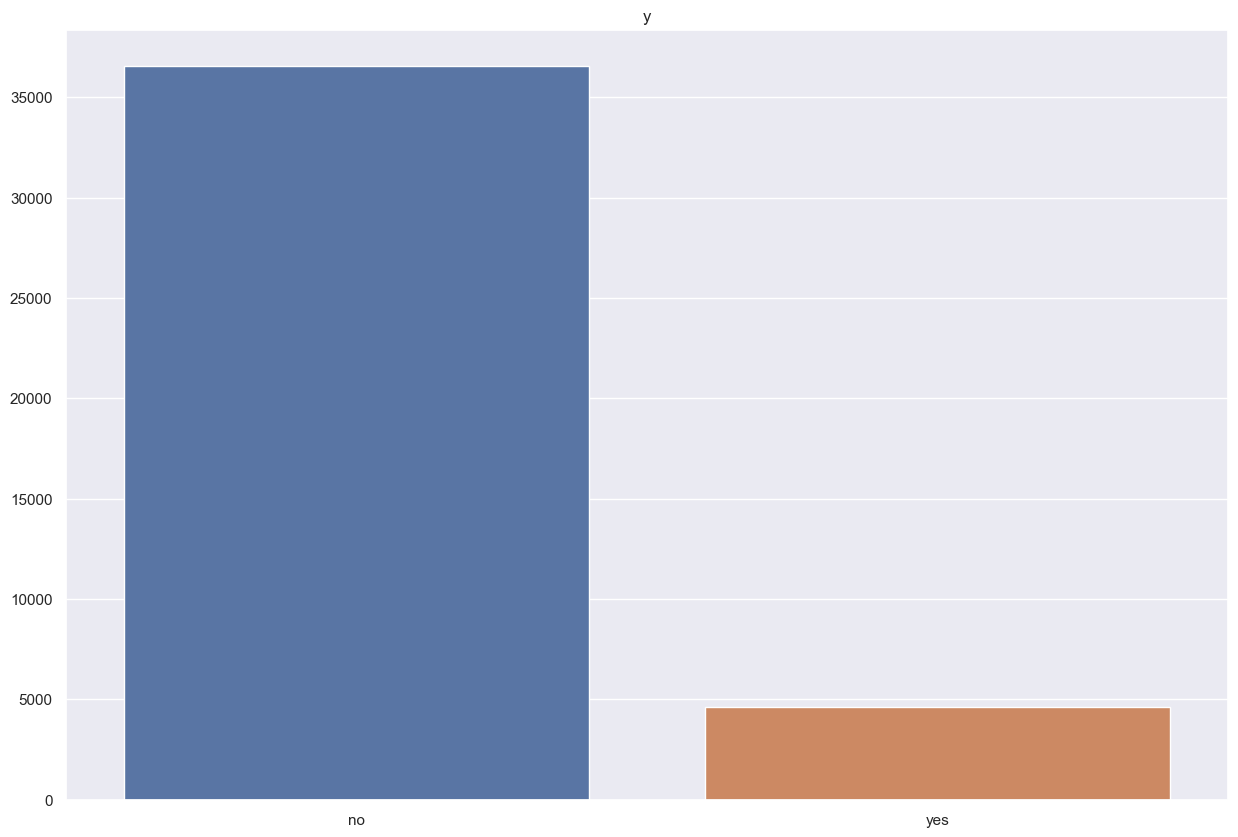

In [58]:
for col in kategori:
    x = df_bank[col].value_counts().index
    y = df_bank[col].value_counts().values
    plt.figure(figsize=(15,10)) 
    sns.set(style='darkgrid')
    sns.barplot(x, y)    
    plt.title(col)
    plt.show()

**Membuat visualisasi data pada seluruh kolom 'le_bank' berupa histogram dengan bins = 30**

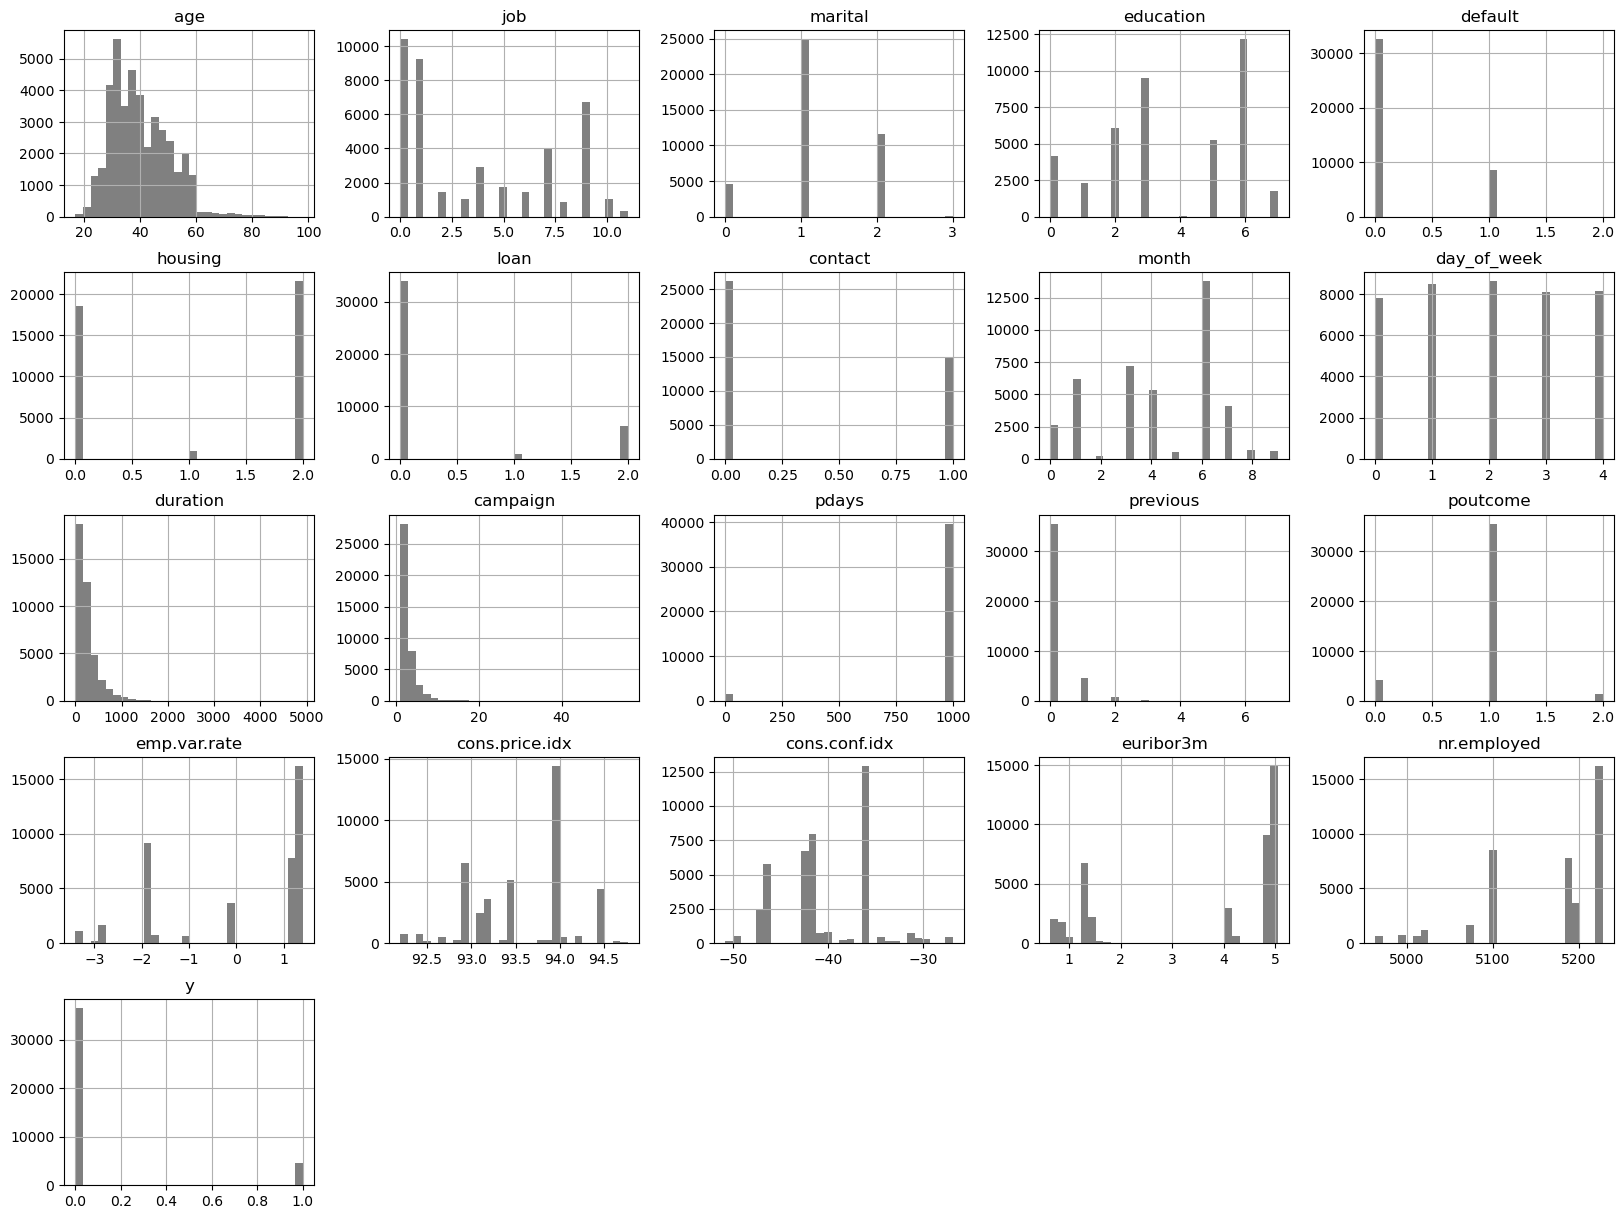

In [51]:
le_bank.hist(bins=30, figsize=(20,15), color='grey')
plt.show()

**Membuat heatmap dari 'le_bank' untuk melihat korelasi antar atribut data**

<AxesSubplot:>

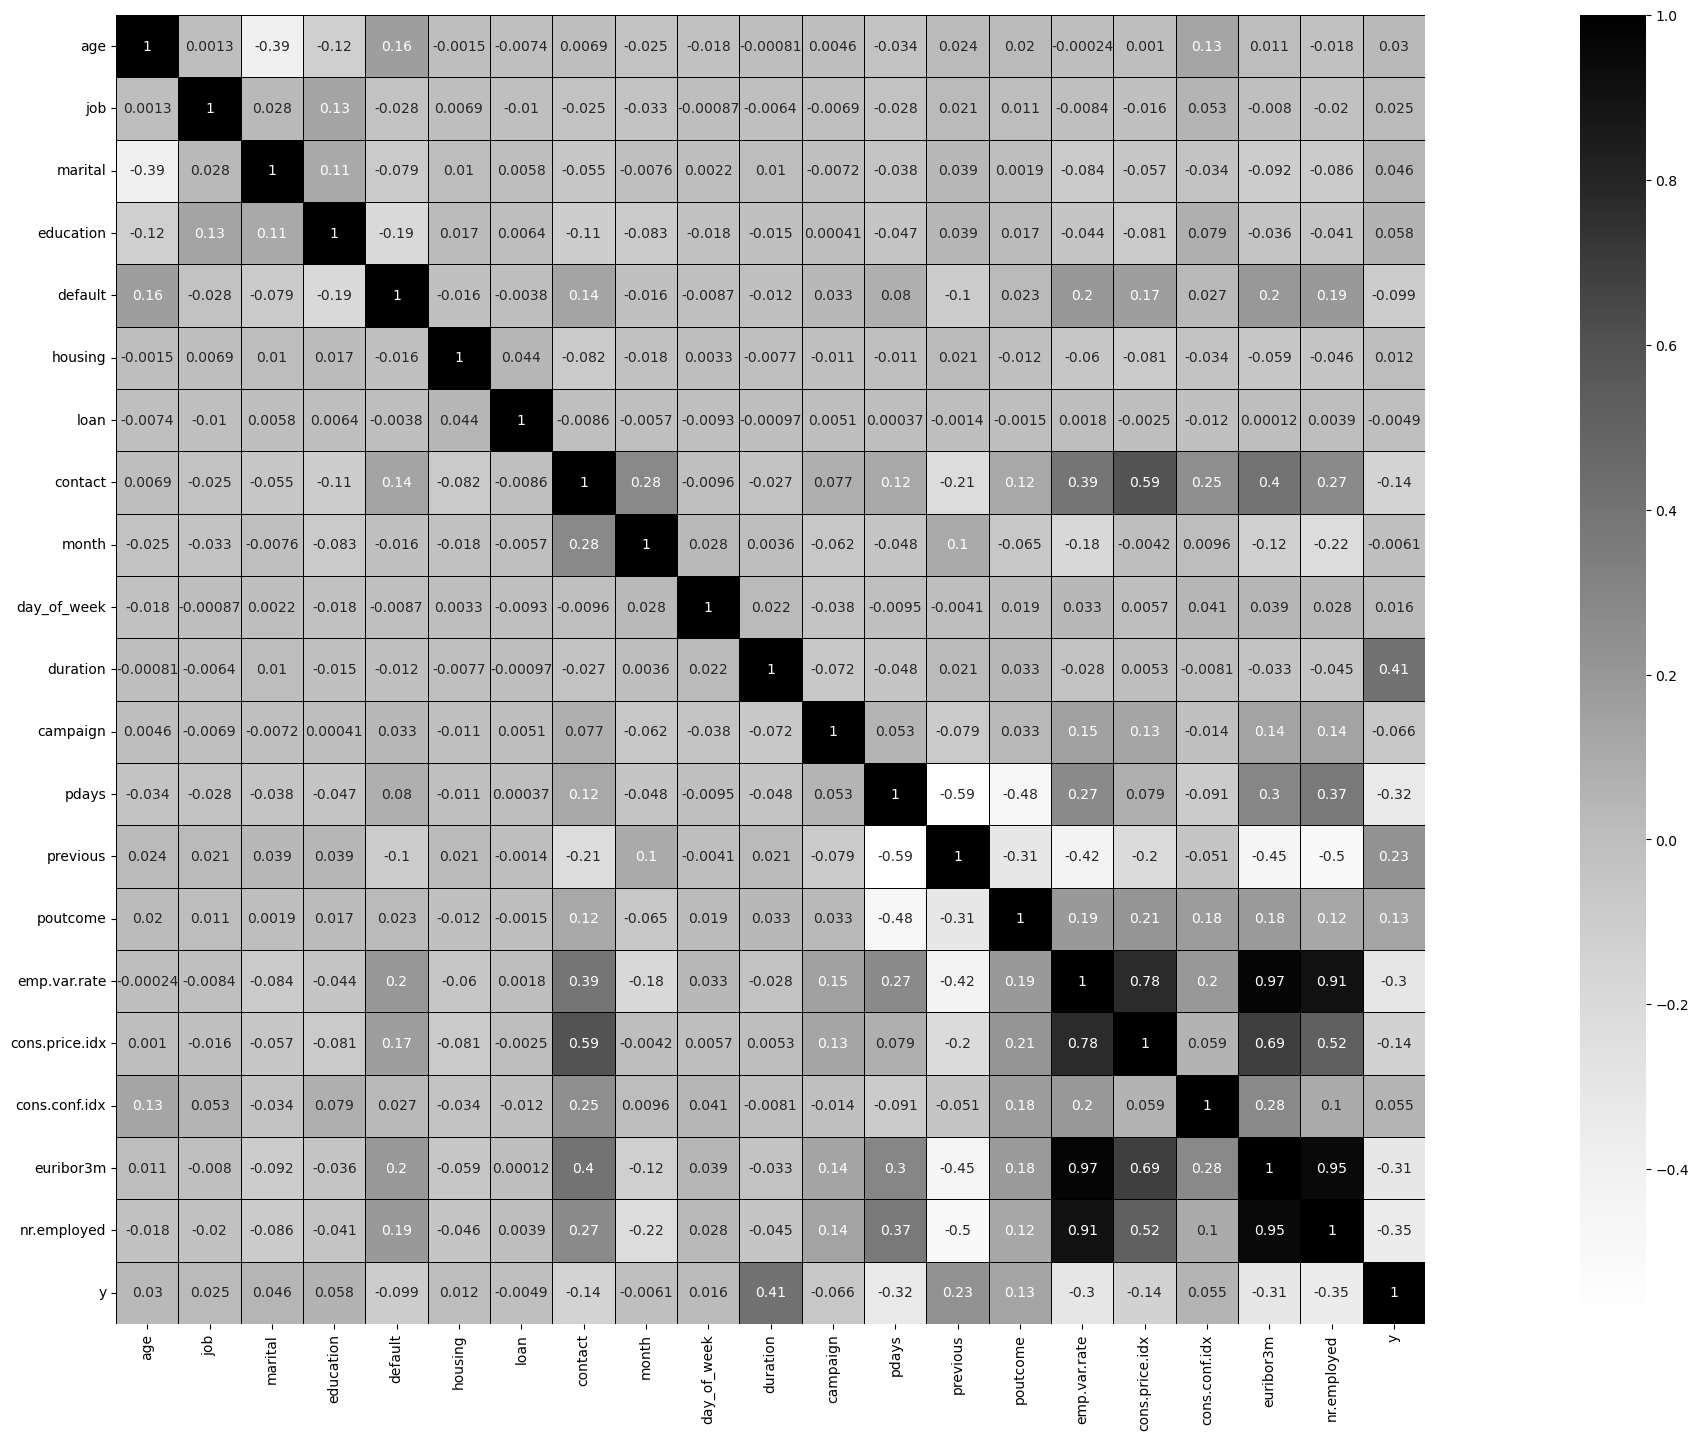

In [39]:
plt.figure(figsize=(40, 17))
sns.heatmap(le_bank.corr(),annot=True, cmap='Greys', linewidths=.5, linecolor='black', square=True)

# Data Modelling

## Logistic Regression

In [44]:
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

y_pred = lr.predict(x_test_scaled)

akurasi = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi Model :", akurasi, "\n")
print(report)

Akurasi Model : 0.9038368139873725 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.66      0.38      0.48       971

    accuracy                           0.90      8236
   macro avg       0.79      0.68      0.72      8236
weighted avg       0.89      0.90      0.89      8236



### Confusion Matrix

Confusion Matrix : 
 [[7073  192]
 [ 600  371]]


<AxesSubplot:>

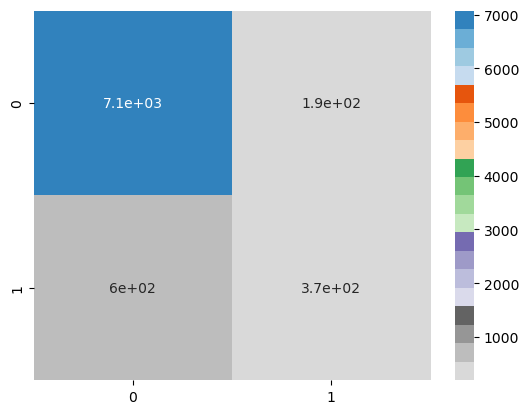

In [46]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix :", "\n", cm)
sns.heatmap(cm, annot=True, cmap='tab20c_r')

## K-Nearest Neighbors

In [47]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(x_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'n_neighbors': 11}
Best Score: 0.9057984213721918


In [61]:
k = 11
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_scaled, y_train)

y_pred2 = knn.predict(x_test_scaled)

akurasi2 = accuracy_score(y_test, y_pred2)
print(f"Akurasi Model: {akurasi2}", "\n")

report = classification_report(y_test, y_pred2)
print(report)

Akurasi Model: 0.9006799417192812 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7265
           1       0.65      0.34      0.45       971

    accuracy                           0.90      8236
   macro avg       0.78      0.66      0.70      8236
weighted avg       0.89      0.90      0.89      8236



### Confusion Matrix

Confusion Matrix : 
 [[7084  181]
 [ 637  334]]


<AxesSubplot:>

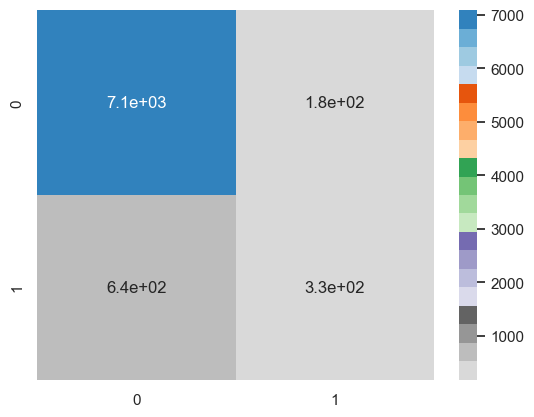

In [62]:
cm = confusion_matrix(y_test, y_pred2)

print("Confusion Matrix :", "\n", cm)
sns.heatmap(cm, annot=True, cmap='tab20c_r')

## Support Vector Machine

### Confusion Matrix

## Decision Tree

### Confusion Matrix

## Random Forest

### Confusion Matrix

## Naive Bayes

### Confusion Matrix

---